# 라이브러리 임포트 및 시각화 한글 폰트 설정

matplotlib 버전에 따라 시각화 코드에서 오류가 날 수 있음 

plt.xlabel(...,loc='right'), ax.bar_label 사용 -> matplotlib 버전 업그레이드 필요할 수 있음 

한글 폰트 깨짐 방지 코드도 일부 수정 



In [ ]:
!pip install --upgrade matplotlib

In [ ]:
# 한글 폰트 다운로드 받는 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 다시 시작 -> 밑의 코드부터 실행하면 된다

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

# 1.20대,30대별 취업자 수 증감 ('21~'22)

## 전처리

데이터 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1DA7012S&conn_path=I3

In [ ]:
fluctuation=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스_산업데이터_9회차/파이널프로젝트/data/연령별_취업자_전년동월_대비_증감.csv',encoding='cp949')
fluctuation

,시도별,시점,계,15 - 19세,20 - 29세,30 - 39세,40 - 49세,50 - 59세,60세이상
0,계,2019.01,19,-31,34,-126,-166,44,264
1,계,2019.02,263,-13,34,-115,-128,88,397
2,계,2019.03,250,-9,52,-82,-168,111,346
3,계,2019.04,171,27,21,-90,-187,65,335
4,계,2019.05,259,12,34,-73,-177,109,354
5,계,2019.06,281,-18,14,-32,-182,127,372
6,계,2019.07,299,-15,28,-23,-179,112,377
7,계,2019.08,452,-9,71,-9,-127,133,391
8,계,2019.09,348,-24,64,-13,-179,119,380
9,계,2019.10,419,3,87,-50,-146,108,417


In [ ]:
del fluctuation['시도별']

In [ ]:
fluctuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        48 non-null     float64
 1   계         48 non-null     int64  
 2   15 - 19세  48 non-null     int64  
 3   20 - 29세  48 non-null     int64  
 4   30 - 39세  48 non-null     int64  
 5   40 - 49세  48 non-null     int64  
 6   50 - 59세  48 non-null     int64  
 7   60세이상     48 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 3.1 KB


In [ ]:
fluctuation=fluctuation[24:] #2021년~2022년 데이터만!

## 시각화

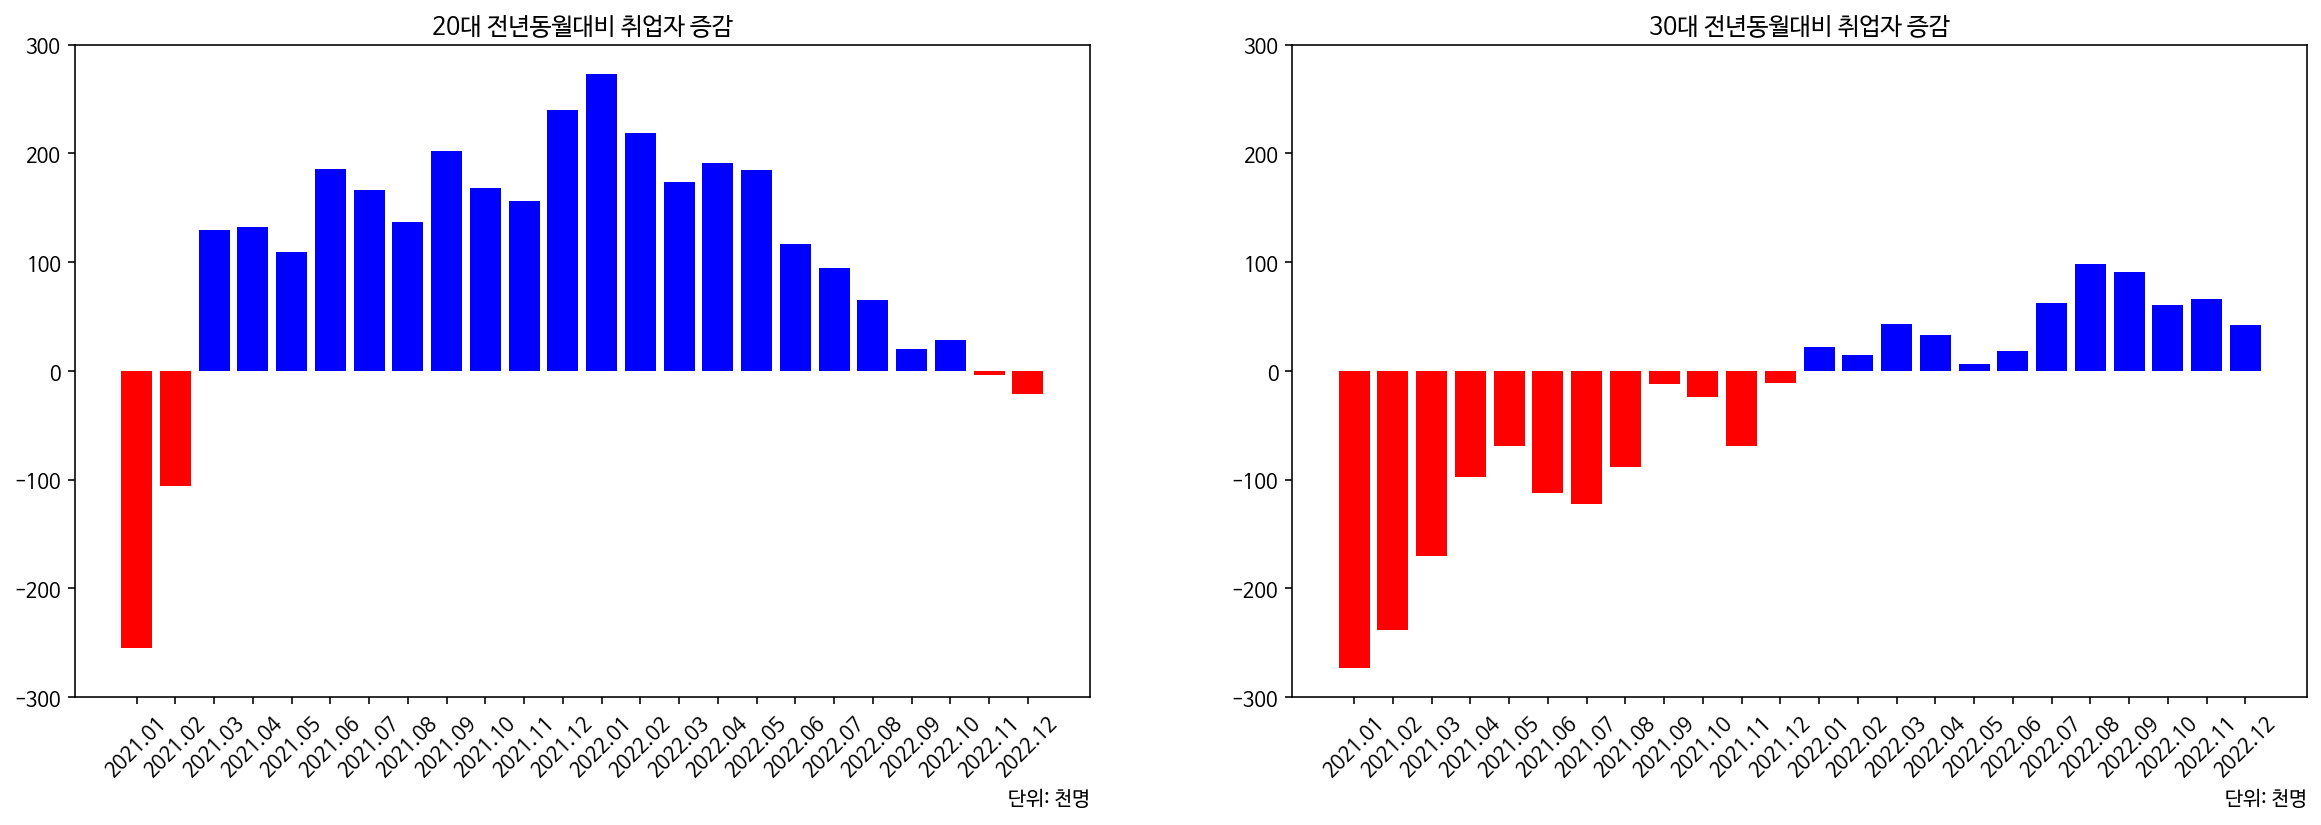

In [ ]:
plt.figure(figsize=(20, 6))

date=[f'{date:.2f}' for date in fluctuation['시점']] # fluctuation['시점']:float , str로 형변환하면 10월이 1월로 바뀌기 때문에 포매팅함

plt.subplot(1,2,1)
plt.bar(date,fluctuation['20 - 29세'],color=['blue' if fluctuation > 0 else 'red'for fluctuation in fluctuation['20 - 29세']])
plt.xticks(rotation=45)
plt.xlabel('단위: 천명',loc='right')
plt.ylim(-300,300)
plt.title('20대 전년동월대비 취업자 증감')

plt.subplot(1,2,2)
plt.bar(date,fluctuation['30 - 39세'],color=['blue' if fluctuation > 0 else 'red'for fluctuation in fluctuation['30 - 39세']])
plt.xticks(rotation=45)
plt.xlabel('단위: 천명',loc='right')
plt.ylim(-300,300)
plt.title('30대 전년동월대비 취업자 증감')

plt.show()

# 2.산업 전망 (채용계획인구 증감률) ('21~'22)

## 전처리

채용계획인원: 조사기준기간 사이에 채용할 계획이 있는 인원 

전년 동반기 대비 채용계획인구 증감률!

데이터 : https://kosis.kr/statHtml/statHtml.do?orgId=118&tblId=DT_118N_DEN051&vw_cd=MT_ZTITLE&list_id=D_33_001_001&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [ ]:
industrial_prospect=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스_산업데이터_9회차/파이널프로젝트/data/산업별_채용.csv',encoding='cp949')
industrial_prospect

,시도별(17개),규모별,산업분류별,2021.1/2,2021.1/2.1,2021.2/2,2021.2/2.1,2022.1/2,2022.1/2.1,2022.2/2,2022.2/2.1
0,시도별(17개),규모별,산업분류별,채용인원 (명),채용계획인원 (명),채용인원 (명),채용계획인원 (명),채용인원 (명),채용계획인원 (명),채용인원 (명),채용계획인원 (명)
1,전국,전규모(1인이상),B.광업(05~08),528,128,356,233,431,239,515,256
2,전국,전규모(1인이상),C.제조업(10~34),122988,114589,142814,143498,143532,169249,144521,163011
3,전국,전규모(1인이상),"D.전기, 가스, 증기 및 공기 조절 공급업(35)",710,864,779,527,577,563,380,373
4,전국,전규모(1인이상),"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",4037,1898,3818,1984,3977,2545,3542,2468
5,전국,전규모(1인이상),F.건설업(41~42),99957,21090,176482,30064,133670,32775,157250,28601
6,전국,전규모(1인이상),G.도매 및 소매업(45~47),90240,50692,99847,70006,105810,70860,105566,76443
7,전국,전규모(1인이상),H.운수 및 창고업(49~52),30930,39420,25266,47288,24166,44552,26534,51040
8,전국,전규모(1인이상),I.숙박 및 음식점업(55~56),65654,28597,78270,58066,94533,74212,111561,62184
9,전국,전규모(1인이상),J.정보통신업(58~63),26215,22788,31624,28132,35533,31769,33318,28080


In [ ]:
del industrial_prospect['시도별(17개)']
del industrial_prospect['규모별']

In [ ]:
industrial_prospect.columns=['산업분류','채용인원 (21 상반기)','채용계획인원 (21 상반기)','채용인원 (21 하반기)','채용계획인원 (21 하반기)',
                              '채용인원 (22 상반기)','채용계획인원 (22 상반기)','채용인원 (22 하반기)','채용계획인원 (22 하반기)']

In [ ]:
industrial_prospect=industrial_prospect.iloc[1:].reset_index(drop=True)
industrial_prospect

,산업분류,채용인원 (21 상반기),채용계획인원 (21 상반기),채용인원 (21 하반기),채용계획인원 (21 하반기),채용인원 (22 상반기),채용계획인원 (22 상반기),채용인원 (22 하반기),채용계획인원 (22 하반기)
0,B.광업(05~08),528,128,356,233,431,239,515,256
1,C.제조업(10~34),122988,114589,142814,143498,143532,169249,144521,163011
2,"D.전기, 가스, 증기 및 공기 조절 공급업(35)",710,864,779,527,577,563,380,373
3,"E.수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",4037,1898,3818,1984,3977,2545,3542,2468
4,F.건설업(41~42),99957,21090,176482,30064,133670,32775,157250,28601
5,G.도매 및 소매업(45~47),90240,50692,99847,70006,105810,70860,105566,76443
6,H.운수 및 창고업(49~52),30930,39420,25266,47288,24166,44552,26534,51040
7,I.숙박 및 음식점업(55~56),65654,28597,78270,58066,94533,74212,111561,62184
8,J.정보통신업(58~63),26215,22788,31624,28132,35533,31769,33318,28080
9,K.금융 및 보험업(64~66),21757,13409,24770,12519,22853,17184,21468,14156


In [ ]:
industrial_prospect['산업분류']=industrial_prospect['산업분류'].apply(lambda x:re.sub("\(.*\)|\s-\s.*",'',x)) # 괄호랑 숫자 제거 
industrial_prospect['산업분류']=industrial_prospect['산업분류'].str[2:] # 영어 대문자와 . 제거 

In [ ]:
industrial_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   산업분류             17 non-null     object
 1   채용인원 (21 상반기)    17 non-null     object
 2   채용계획인원 (21 상반기)  17 non-null     object
 3   채용인원 (21 하반기)    17 non-null     object
 4   채용계획인원 (21 하반기)  17 non-null     object
 5   채용인원 (22 상반기)    17 non-null     object
 6   채용계획인원 (22 상반기)  17 non-null     object
 7   채용인원 (22 하반기)    17 non-null     object
 8   채용계획인원 (22 하반기)  17 non-null     object
dtypes: object(9)
memory usage: 1.3+ KB


In [ ]:
industrial_prospect.set_index('산업분류',inplace=True)
industrial_prospect=industrial_prospect.astype(int)
industrial_prospect.reset_index(inplace=True)

In [ ]:
industrial_prospect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   산업분류             17 non-null     object
 1   채용인원 (21 상반기)    17 non-null     int64 
 2   채용계획인원 (21 상반기)  17 non-null     int64 
 3   채용인원 (21 하반기)    17 non-null     int64 
 4   채용계획인원 (21 하반기)  17 non-null     int64 
 5   채용인원 (22 상반기)    17 non-null     int64 
 6   채용계획인원 (22 상반기)  17 non-null     int64 
 7   채용인원 (22 하반기)    17 non-null     int64 
 8   채용계획인원 (22 하반기)  17 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.3+ KB


In [ ]:
# 상반기만 비교 
first_half=industrial_prospect.copy()
# 하반기만 비교
second_half=industrial_prospect.copy()

In [ ]:
first_half=first_half.iloc[:,[0,1,2,5,6]] # 상반기 부분만 뽑기

In [ ]:
second_half=second_half.iloc[:,[0,3,4,7,8]] # 하반기 부분만 뽑기

In [ ]:
first_half['채용계획인원 증감률']=np.trunc(((first_half['채용계획인원 (22 상반기)']-first_half['채용계획인원 (21 상반기)']) / first_half['채용계획인원 (21 상반기)'] *100)*100)/100
first_half

,산업분류,채용인원 (21 상반기),채용계획인원 (21 상반기),채용인원 (22 상반기),채용계획인원 (22 상반기),채용계획인원 증감률
0,광업,528,128,431,239,86.71
1,제조업,122988,114589,143532,169249,47.70
2,"전기, 가스, 증기 및 공기 조절 공급업",710,864,577,563,-34.83
3,"수도, 하수 및 폐기물 처리, 원료 재생업",4037,1898,3977,2545,34.08
4,건설업,99957,21090,133670,32775,55.40
5,도매 및 소매업,90240,50692,105810,70860,39.78
6,운수 및 창고업,30930,39420,24166,44552,13.01
7,숙박 및 음식점업,65654,28597,94533,74212,159.50
8,정보통신업,26215,22788,35533,31769,39.41
9,금융 및 보험업,21757,13409,22853,17184,28.15


In [ ]:
second_half['채용계획인원 증감률']=np.trunc(((second_half['채용계획인원 (22 하반기)']-second_half['채용계획인원 (21 하반기)']) / second_half['채용계획인원 (21 하반기)'] *100)*100)/100
second_half

,산업분류,채용인원 (21 하반기),채용계획인원 (21 하반기),채용인원 (22 하반기),채용계획인원 (22 하반기),채용계획인원 증감률
0,광업,356,233,515,256,9.87
1,제조업,142814,143498,144521,163011,13.59
2,"전기, 가스, 증기 및 공기 조절 공급업",779,527,380,373,-29.22
3,"수도, 하수 및 폐기물 처리, 원료 재생업",3818,1984,3542,2468,24.39
4,건설업,176482,30064,157250,28601,-4.86
5,도매 및 소매업,99847,70006,105566,76443,9.19
6,운수 및 창고업,25266,47288,26534,51040,7.93
7,숙박 및 음식점업,78270,58066,111561,62184,7.09
8,정보통신업,31624,28132,33318,28080,-0.18
9,금융 및 보험업,24770,12519,21468,14156,13.07


## 시각화 


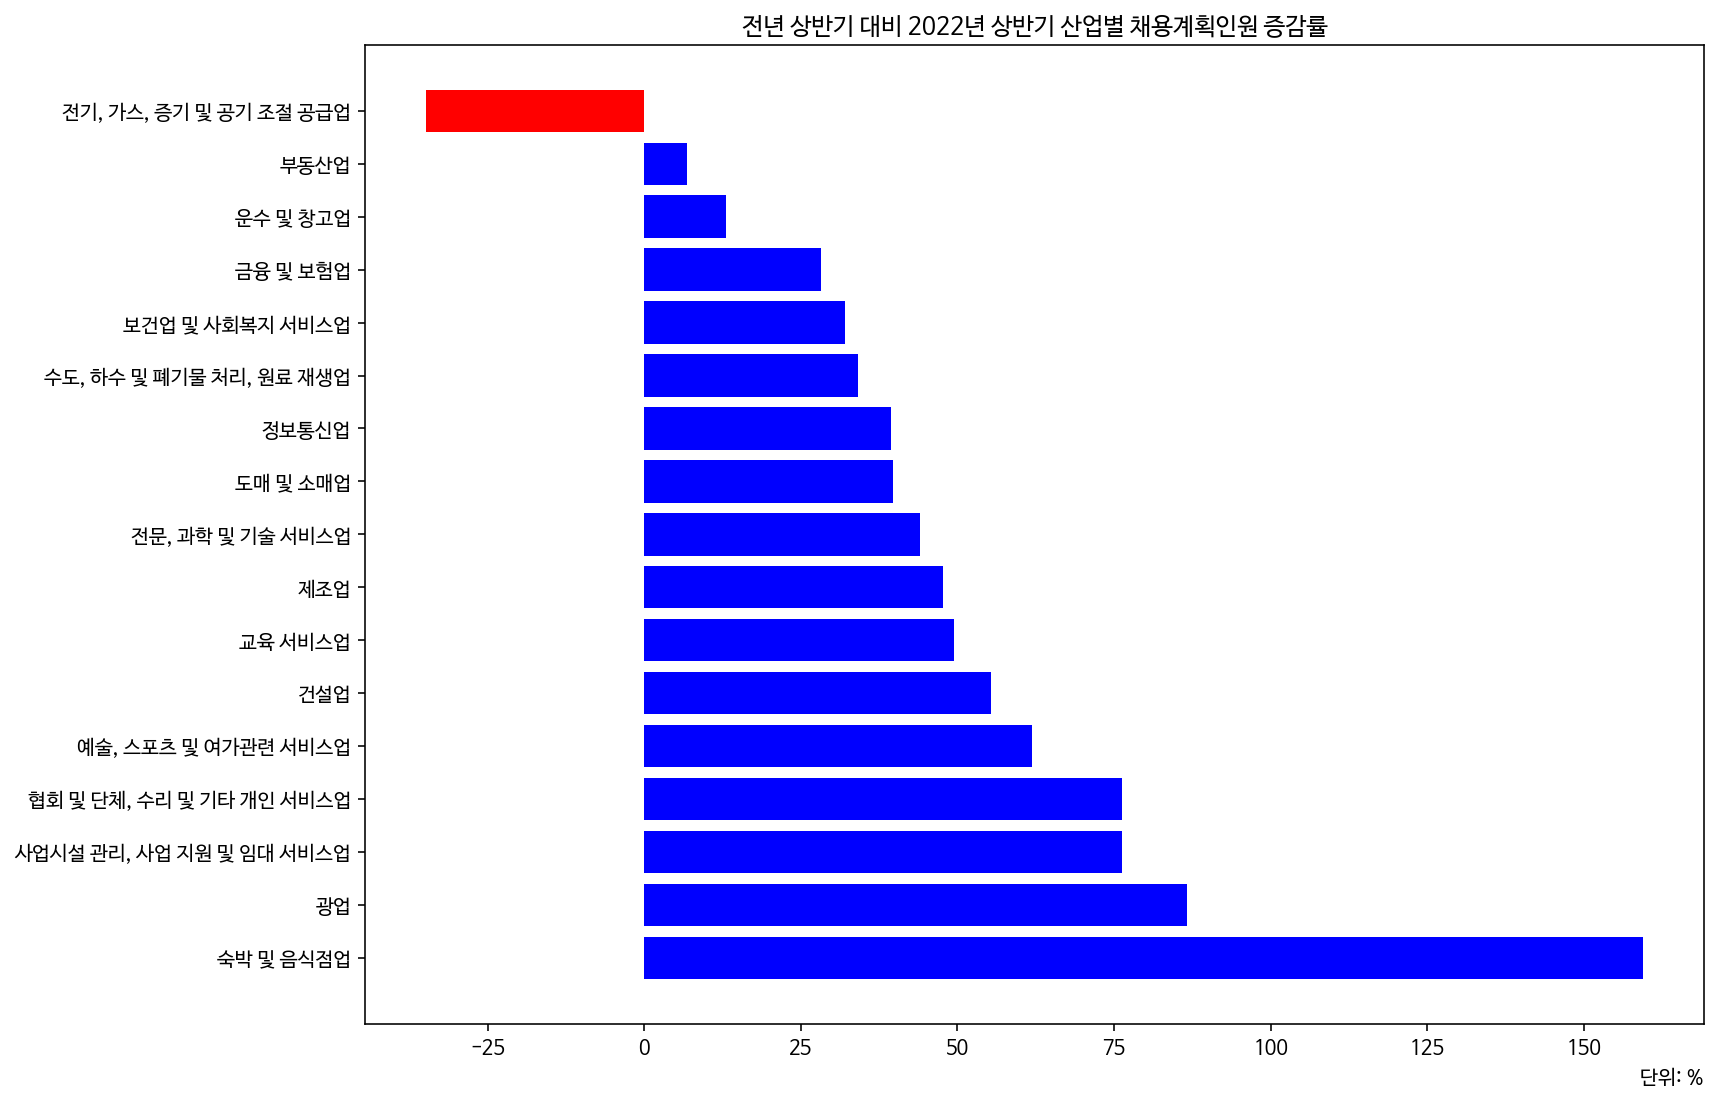

In [ ]:
# 상반기끼리 비교 
first_sorted_pct_change=first_half.sort_values(by='채용계획인원 증감률',ascending=False)
first_sorted_pct_change

plt.barh(first_sorted_pct_change['산업분류'],first_sorted_pct_change['채용계획인원 증감률'],color=['blue' if pct_change > 0 else 'red'for pct_change in first_sorted_pct_change['채용계획인원 증감률']])
plt.xlabel('단위: %',loc='right')
plt.title('전년 상반기 대비 2022년 상반기 산업별 채용계획인원 증감률')
plt.show()

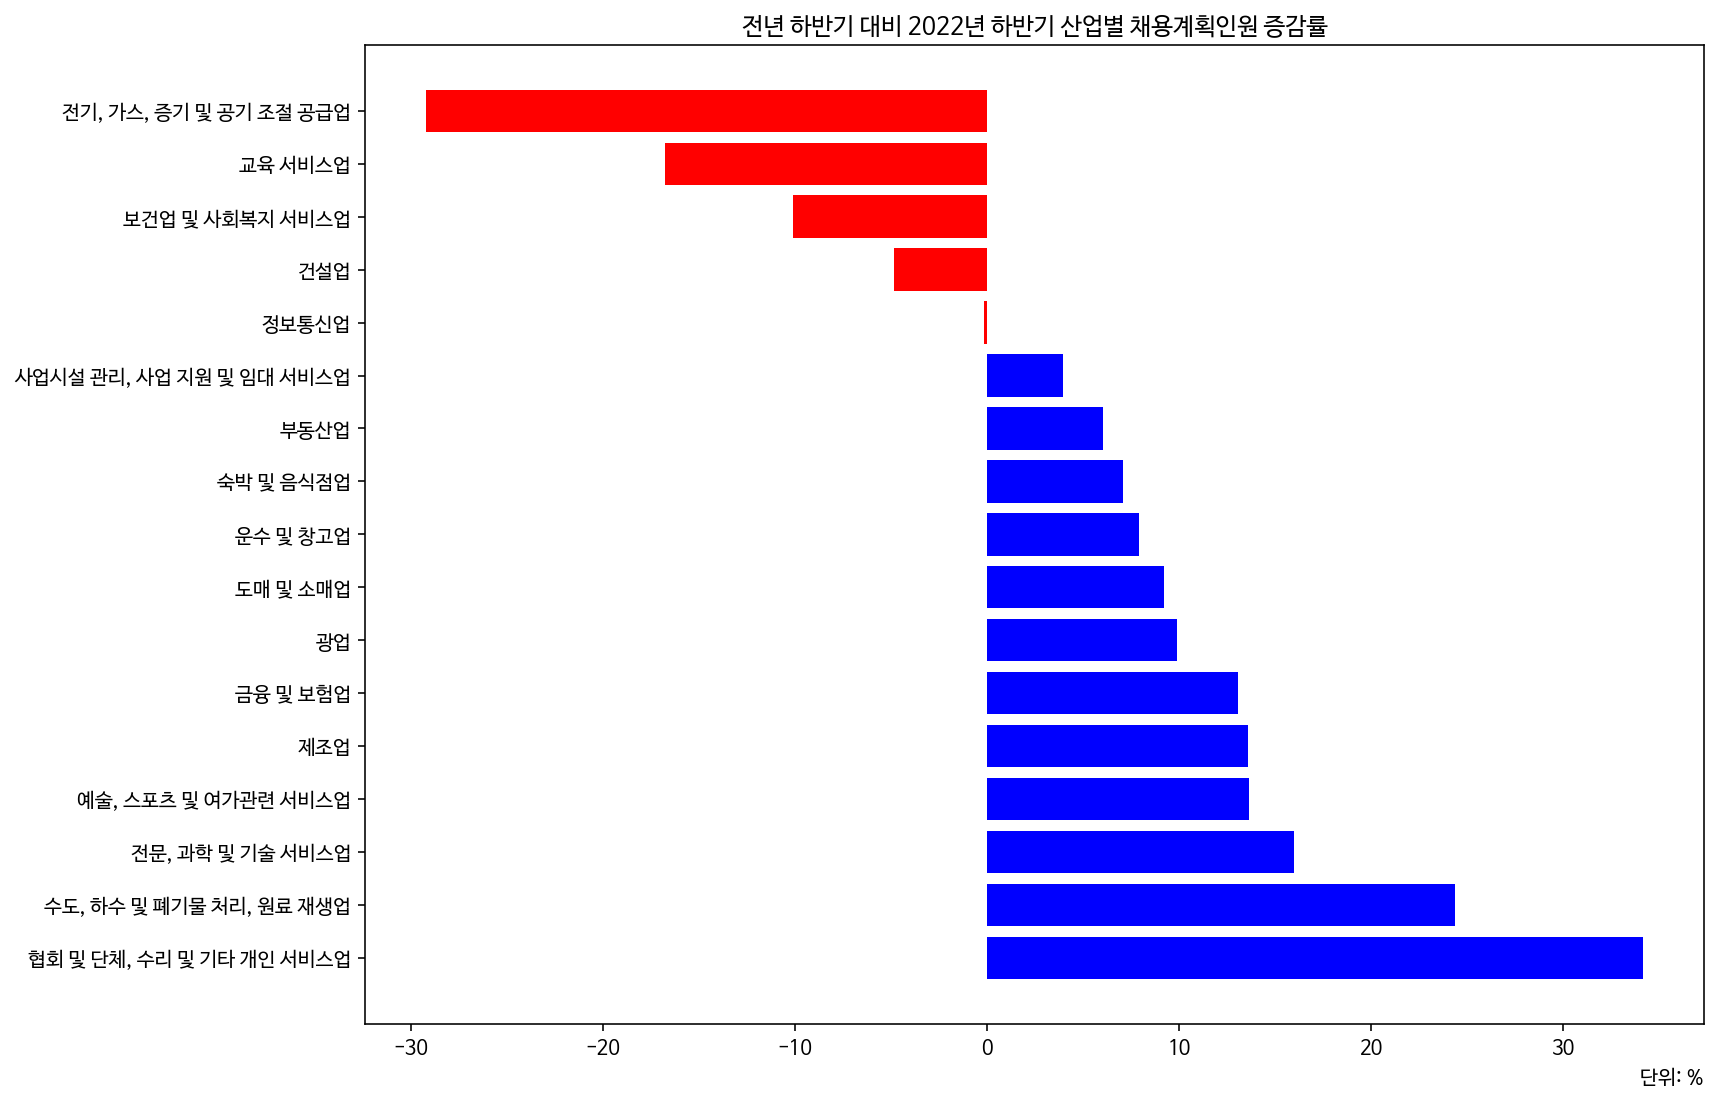

In [ ]:
# 하반기끼리 비교 
second_sorted_pct_change=second_half.sort_values(by='채용계획인원 증감률',ascending=False)
second_sorted_pct_change

plt.barh(second_sorted_pct_change['산업분류'],second_sorted_pct_change['채용계획인원 증감률'],color=['blue' if pct_change > 0 else 'red'for pct_change in second_sorted_pct_change['채용계획인원 증감률']])
plt.xlabel('단위: %',loc='right')
plt.title('전년 하반기 대비 2022년 하반기 산업별 채용계획인원 증감률')
plt.show()

# 3.한국과 일본 구인배수 비교 ('19~'22) 

## 전처리

- 한국 (https://eis.work.go.kr/eisps/rpt/reptDtl.do?menuId=020010020)
- 일본 (https://kr.investing.com/economic-calendar/jobs-applications-ratio-1001)

In [ ]:
# 2019~2022년 구인인원과 구직자수 엑셀파일 불러오기 (11월을 기준으로 함)
kr=pd.read_excel('/content/drive/MyDrive/멀티캠퍼스_산업데이터_9회차/파이널프로젝트/data/한국유효구인구직현황(전체)_19_22.xls',skiprows=12,usecols='A,B,C,Z,AA,AX,AY,BV,BW')
kr     

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,2022년 11월,Unnamed: 2,2021년 11월,Unnamed: 26,2020년 11월,Unnamed: 50,2019년 11월,Unnamed: 74
0,(지역별)시도,유효구인인원(전체),유효구직자수(전체),유효구인인원(전체),유효구직자수(전체),유효구인인원(전체),유효구직자수(전체),유효구인인원(전체),유효구직자수(전체)
1,총계,278052.0,1325897.0,242173.0,1453358.0,197111.0,1305695.0,178983.0,1076955.0
2,서울,42217.0,215315.0,35597.0,249145.0,27298.0,234280.0,25967.0,176068.0
3,부산,14172.0,110740.0,12344.0,121334.0,9098.0,107191.0,9808.0,93499.0
4,대구,9031.0,73057.0,7331.0,76643.0,6657.0,64188.0,6390.0,55155.0
5,인천,13528.0,80532.0,11928.0,90403.0,9021.0,85760.0,7385.0,69301.0
6,광주,4746.0,39493.0,5721.0,41041.0,4347.0,35046.0,3558.0,29161.0
7,대전,4290.0,36669.0,3713.0,39061.0,3091.0,33059.0,2861.0,29140.0
8,울산,6837.0,39418.0,5366.0,43390.0,4281.0,38064.0,3428.0,32367.0
9,세종,1468.0,7660.0,1370.0,7489.0,1121.0,6328.0,752.0,5706.0


In [ ]:
kr=kr.iloc[:-1] # 분류불능 제거 
kr.columns=["지역","구인인원('22)","구직자수('22)","구인인원('21)","구직자수('21)","구인인원('20)","구직자수('20)","구인인원('19)","구직자수('19)"]
kr=kr.iloc[1:].reset_index(drop=True)
kr

,지역,구인인원('22),구직자수('22),구인인원('21),구직자수('21),구인인원('20),구직자수('20),구인인원('19),구직자수('19)
0,총계,278052.0,1325897.0,242173.0,1453358.0,197111.0,1305695.0,178983.0,1076955.0
1,서울,42217.0,215315.0,35597.0,249145.0,27298.0,234280.0,25967.0,176068.0
2,부산,14172.0,110740.0,12344.0,121334.0,9098.0,107191.0,9808.0,93499.0
3,대구,9031.0,73057.0,7331.0,76643.0,6657.0,64188.0,6390.0,55155.0
4,인천,13528.0,80532.0,11928.0,90403.0,9021.0,85760.0,7385.0,69301.0
5,광주,4746.0,39493.0,5721.0,41041.0,4347.0,35046.0,3558.0,29161.0
6,대전,4290.0,36669.0,3713.0,39061.0,3091.0,33059.0,2861.0,29140.0
7,울산,6837.0,39418.0,5366.0,43390.0,4281.0,38064.0,3428.0,32367.0
8,세종,1468.0,7660.0,1370.0,7489.0,1121.0,6328.0,752.0,5706.0
9,경기,81589.0,332142.0,75947.0,364362.0,59761.0,337484.0,50331.0,273448.0


In [ ]:
kr["구인배수('22)"]=kr["구인인원('22)"]/kr["구직자수('22)"]
kr["구인배수('21)"]=kr["구인인원('21)"]/kr["구직자수('21)"]
kr["구인배수('20)"]=kr["구인인원('20)"]/kr["구직자수('20)"]
kr["구인배수('19)"]=kr["구인인원('19)"]/kr["구직자수('19)"]

In [ ]:
kr

,지역,구인인원('22),구직자수('22),구인인원('21),구직자수('21),구인인원('20),구직자수('20),구인인원('19),구직자수('19),구인배수('22),구인배수('21),구인배수('20),구인배수('19)
0,총계,278052.0,1325897.0,242173.0,1453358.0,197111.0,1305695.0,178983.0,1076955.0,0.209709,0.16663,0.150963,0.166194
1,서울,42217.0,215315.0,35597.0,249145.0,27298.0,234280.0,25967.0,176068.0,0.196071,0.142877,0.116519,0.147483
2,부산,14172.0,110740.0,12344.0,121334.0,9098.0,107191.0,9808.0,93499.0,0.127975,0.101736,0.084877,0.1049
3,대구,9031.0,73057.0,7331.0,76643.0,6657.0,64188.0,6390.0,55155.0,0.123616,0.095651,0.103711,0.115855
4,인천,13528.0,80532.0,11928.0,90403.0,9021.0,85760.0,7385.0,69301.0,0.167983,0.131943,0.105189,0.106564
5,광주,4746.0,39493.0,5721.0,41041.0,4347.0,35046.0,3558.0,29161.0,0.120173,0.139397,0.124037,0.122012
6,대전,4290.0,36669.0,3713.0,39061.0,3091.0,33059.0,2861.0,29140.0,0.116993,0.095056,0.0935,0.098181
7,울산,6837.0,39418.0,5366.0,43390.0,4281.0,38064.0,3428.0,32367.0,0.173449,0.123669,0.112468,0.10591
8,세종,1468.0,7660.0,1370.0,7489.0,1121.0,6328.0,752.0,5706.0,0.191645,0.182935,0.177149,0.131791
9,경기,81589.0,332142.0,75947.0,364362.0,59761.0,337484.0,50331.0,273448.0,0.245645,0.208438,0.177078,0.184061


In [ ]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   지역         18 non-null     object
 1   구인인원('22)  18 non-null     object
 2   구직자수('22)  18 non-null     object
 3   구인인원('21)  18 non-null     object
 4   구직자수('21)  18 non-null     object
 5   구인인원('20)  18 non-null     object
 6   구직자수('20)  18 non-null     object
 7   구인인원('19)  18 non-null     object
 8   구직자수('19)  18 non-null     object
 9   구인배수('22)  18 non-null     object
 10  구인배수('21)  18 non-null     object
 11  구인배수('20)  18 non-null     object
 12  구인배수('19)  18 non-null     object
dtypes: object(13)
memory usage: 2.0+ KB


In [ ]:
kr["구인배수('22)"]=kr["구인배수('22)"].astype(float)
kr["구인배수('21)"]=kr["구인배수('21)"].astype(float)
kr["구인배수('20)"]=kr["구인배수('20)"].astype(float)
kr["구인배수('19)"]=kr["구인배수('19)"].astype(float)

In [ ]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         18 non-null     object 
 1   구인인원('22)  18 non-null     object 
 2   구직자수('22)  18 non-null     object 
 3   구인인원('21)  18 non-null     object 
 4   구직자수('21)  18 non-null     object 
 5   구인인원('20)  18 non-null     object 
 6   구직자수('20)  18 non-null     object 
 7   구인인원('19)  18 non-null     object 
 8   구직자수('19)  18 non-null     object 
 9   구인배수('22)  18 non-null     float64
 10  구인배수('21)  18 non-null     float64
 11  구인배수('20)  18 non-null     float64
 12  구인배수('19)  18 non-null     float64
dtypes: float64(4), object(9)
memory usage: 2.0+ KB


In [ ]:
kr["구인배수('22)"]=round(kr["구인배수('22)"],2)
kr["구인배수('21)"]=round(kr["구인배수('21)"],2)
kr["구인배수('20)"]=round(kr["구인배수('20)"],2)
kr["구인배수('19)"]=round(kr["구인배수('19)"],2)

In [ ]:
kr

,지역,구인인원('22),구직자수('22),구인인원('21),구직자수('21),구인인원('20),구직자수('20),구인인원('19),구직자수('19),구인배수('22),구인배수('21),구인배수('20),구인배수('19)
0,총계,278052.0,1325897.0,242173.0,1453358.0,197111.0,1305695.0,178983.0,1076955.0,0.21,0.17,0.15,0.17
1,서울,42217.0,215315.0,35597.0,249145.0,27298.0,234280.0,25967.0,176068.0,0.20,0.14,0.12,0.15
2,부산,14172.0,110740.0,12344.0,121334.0,9098.0,107191.0,9808.0,93499.0,0.13,0.10,0.08,0.10
3,대구,9031.0,73057.0,7331.0,76643.0,6657.0,64188.0,6390.0,55155.0,0.12,0.10,0.10,0.12
4,인천,13528.0,80532.0,11928.0,90403.0,9021.0,85760.0,7385.0,69301.0,0.17,0.13,0.11,0.11
5,광주,4746.0,39493.0,5721.0,41041.0,4347.0,35046.0,3558.0,29161.0,0.12,0.14,0.12,0.12
6,대전,4290.0,36669.0,3713.0,39061.0,3091.0,33059.0,2861.0,29140.0,0.12,0.10,0.09,0.10
7,울산,6837.0,39418.0,5366.0,43390.0,4281.0,38064.0,3428.0,32367.0,0.17,0.12,0.11,0.11
8,세종,1468.0,7660.0,1370.0,7489.0,1121.0,6328.0,752.0,5706.0,0.19,0.18,0.18,0.13
9,경기,81589.0,332142.0,75947.0,364362.0,59761.0,337484.0,50331.0,273448.0,0.25,0.21,0.18,0.18


## 시각화

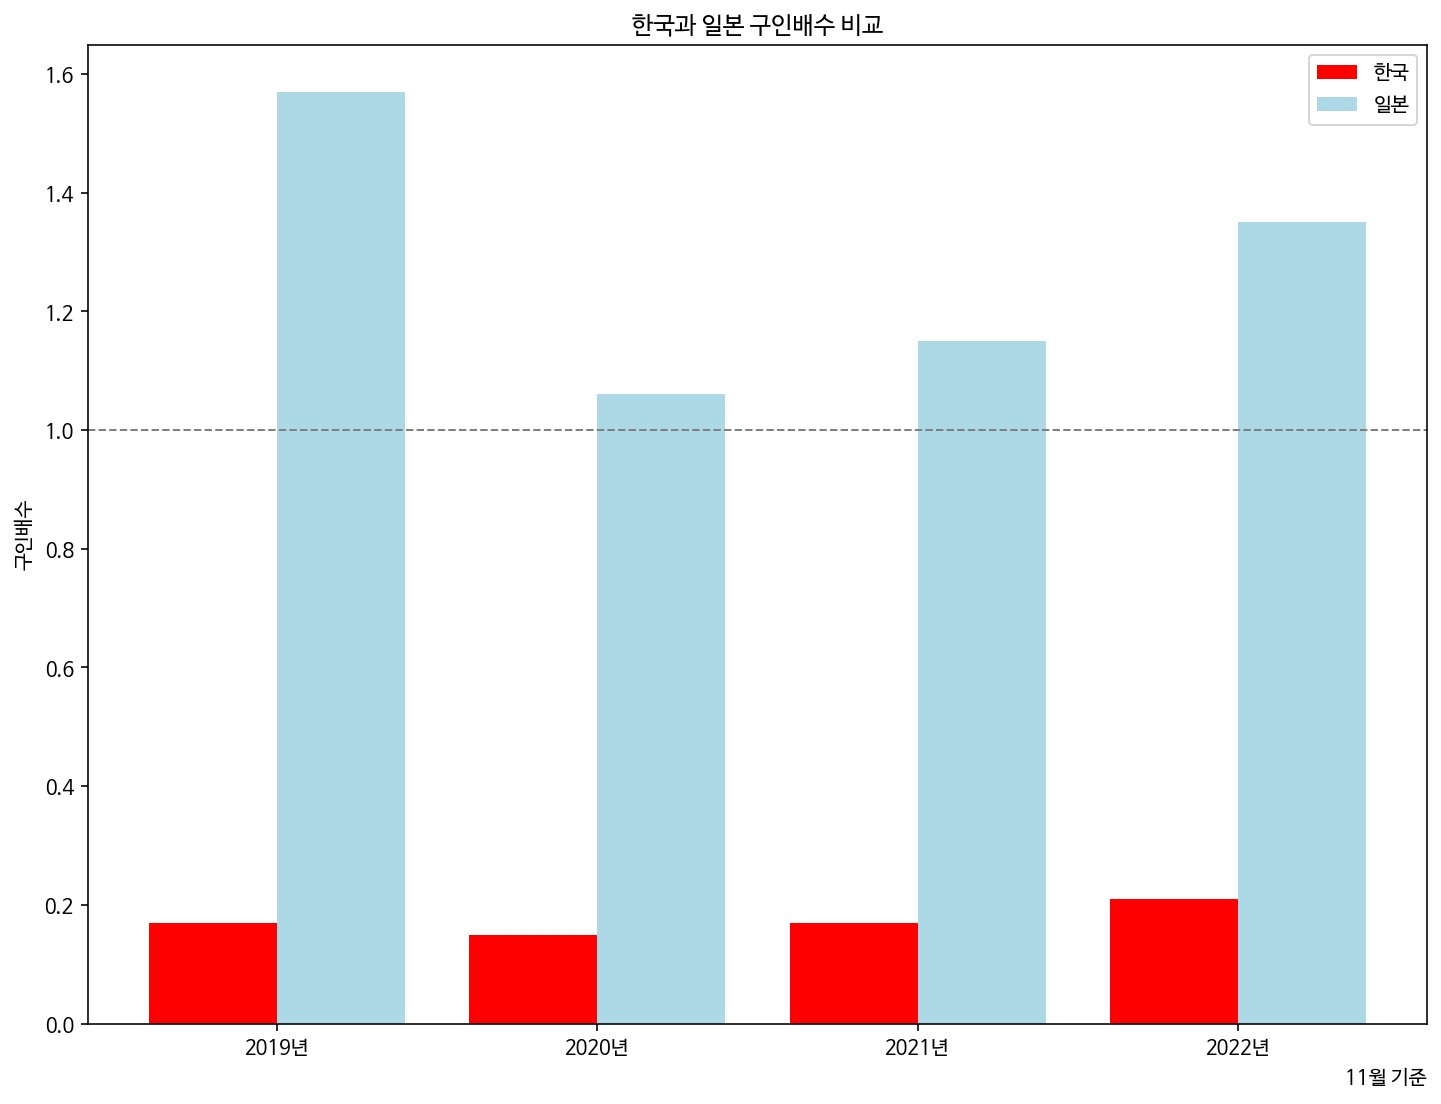

In [ ]:
date=["2019년","2020년","2021년","2022년"]

kr_ratio=kr.iloc[0,-1:8:-1] # 19~22년 한국의 구인배수
jp_ratio=[1.57,1.06,1.15,1.35] # 일본의 2019~2022 구인배수 , 11월을 기준으로 함 (값이 4개 뿐이라, 홈페이지에서 값 가져 옴)

bar_width=0.4
index=np.arange(len(date))

plt.bar(index,kr_ratio,color='red',align='edge',width=bar_width,label='한국')
plt.bar(index+bar_width,jp_ratio,color='lightblue',align='edge',width=bar_width,label='일본')
plt.axhline(y=1.0,linewidth=1,linestyle='--', color='gray')

plt.xticks(index+bar_width,date)
plt.legend()
plt.xlabel('11월 기준',loc='right')
plt.ylabel('구인배수')
plt.title('한국과 일본 구인배수 비교')
plt.show()

# 4.선호도 시각화 ('21)

## 전처리

In [ ]:
preference=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스_산업데이터_9회차/파이널프로젝트/data/선호도.csv',encoding='cp949')
preference

,특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,특성별(1),특성별(2),분위기 좋은 회사,급여가 높은 회사,유명한 회사,안정적인 회사,퇴근이 빠른 회사,발전 가능성이 높은 회사,직무가 적성에 맞는 회사,복지 수준이 좋은 회사
1,전체,소계,8.6,15.5,1.0,24.6,3.6,11.0,18.0,17.8
2,성별,남자,8.8,17.0,1.2,22.7,2.4,13.2,18.9,15.6
3,성별,여자,8.3,13.7,0.7,26.7,4.9,8.4,16.9,20.3
4,연령별,만18-24세,9.6,12.7,1.0,24.7,2.9,10.2,20.3,18.7
5,연령별,만25-29세,7.8,16.7,0.8,23.8,4.0,11.1,19.1,16.6
6,연령별,만30-34세,8.2,17.5,1.1,25.4,4.1,11.8,13.9,18.0
7,지역별,수도권,8.0,17.0,1.3,23.2,3.9,12.9,18.8,14.9
8,지역별,비수도권,9.2,13.7,0.7,26.2,3.2,8.8,17.0,21.2
9,학력별,고졸 이하 또는 대학 재학,9.3,16.1,1.2,24.2,3.1,11.6,19.3,15.3


In [ ]:
preference=preference.rename(columns={'2021':'분위기','2021.1':'급여','2021.2':'인지도','2021.3':'안정성','2021.4':'빠른 퇴근','2021.5':'발전 가능성','2021.6':'직무','2021.7':'복지'})
preference=preference.iloc[1:]
preference.reset_index(drop=True,inplace=True)
preference

,특성별(1),특성별(2),분위기,급여,인지도,안정성,빠른 퇴근,발전 가능성,직무,복지
0,전체,소계,8.6,15.5,1.0,24.6,3.6,11.0,18.0,17.8
1,성별,남자,8.8,17.0,1.2,22.7,2.4,13.2,18.9,15.6
2,성별,여자,8.3,13.7,0.7,26.7,4.9,8.4,16.9,20.3
3,연령별,만18-24세,9.6,12.7,1.0,24.7,2.9,10.2,20.3,18.7
4,연령별,만25-29세,7.8,16.7,0.8,23.8,4.0,11.1,19.1,16.6
5,연령별,만30-34세,8.2,17.5,1.1,25.4,4.1,11.8,13.9,18.0
6,지역별,수도권,8.0,17.0,1.3,23.2,3.9,12.9,18.8,14.9
7,지역별,비수도권,9.2,13.7,0.7,26.2,3.2,8.8,17.0,21.2
8,학력별,고졸 이하 또는 대학 재학,9.3,16.1,1.2,24.2,3.1,11.6,19.3,15.3
9,학력별,대졸이상(대학원생 포함),7.9,14.9,0.8,25.0,4.1,10.4,16.7,20.2


In [ ]:
preference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   특성별(1)  10 non-null     object
 1   특성별(2)  10 non-null     object
 2   분위기     10 non-null     object
 3   급여      10 non-null     object
 4   인지도     10 non-null     object
 5   안정성     10 non-null     object
 6   빠른 퇴근   10 non-null     object
 7   발전 가능성  10 non-null     object
 8   직무      10 non-null     object
 9   복지      10 non-null     object
dtypes: object(10)
memory usage: 928.0+ bytes


In [ ]:
preference['분위기']=preference['분위기'].astype(float);preference['빠른 퇴근']=preference['빠른 퇴근'].astype(float)
preference['급여']=preference['급여'].astype(float);preference['발전 가능성']=preference['발전 가능성'].astype(float)
preference['인지도']=preference['인지도'].astype(float);preference['직무']=preference['직무'].astype(float)
preference['안정성']=preference['안정성'].astype(float);preference['복지']=preference['복지'].astype(float)

In [ ]:
preference=preference[['특성별(1)','특성별(2)','안정성','직무','복지','급여','발전 가능성','분위기','빠른 퇴근','인지도']] # 칼럼 순서 변경경
preference

,특성별(1),특성별(2),안정성,직무,복지,급여,발전 가능성,분위기,빠른 퇴근,인지도
0,전체,소계,24.6,18.0,17.8,15.5,11.0,8.6,3.6,1.0
1,성별,남자,22.7,18.9,15.6,17.0,13.2,8.8,2.4,1.2
2,성별,여자,26.7,16.9,20.3,13.7,8.4,8.3,4.9,0.7
3,연령별,만18-24세,24.7,20.3,18.7,12.7,10.2,9.6,2.9,1.0
4,연령별,만25-29세,23.8,19.1,16.6,16.7,11.1,7.8,4.0,0.8
5,연령별,만30-34세,25.4,13.9,18.0,17.5,11.8,8.2,4.1,1.1
6,지역별,수도권,23.2,18.8,14.9,17.0,12.9,8.0,3.9,1.3
7,지역별,비수도권,26.2,17.0,21.2,13.7,8.8,9.2,3.2,0.7
8,학력별,고졸 이하 또는 대학 재학,24.2,19.3,15.3,16.1,11.6,9.3,3.1,1.2
9,학력별,대졸이상(대학원생 포함),25.0,16.7,20.2,14.9,10.4,7.9,4.1,0.8


## 시각화 

- 선호도 (전체)

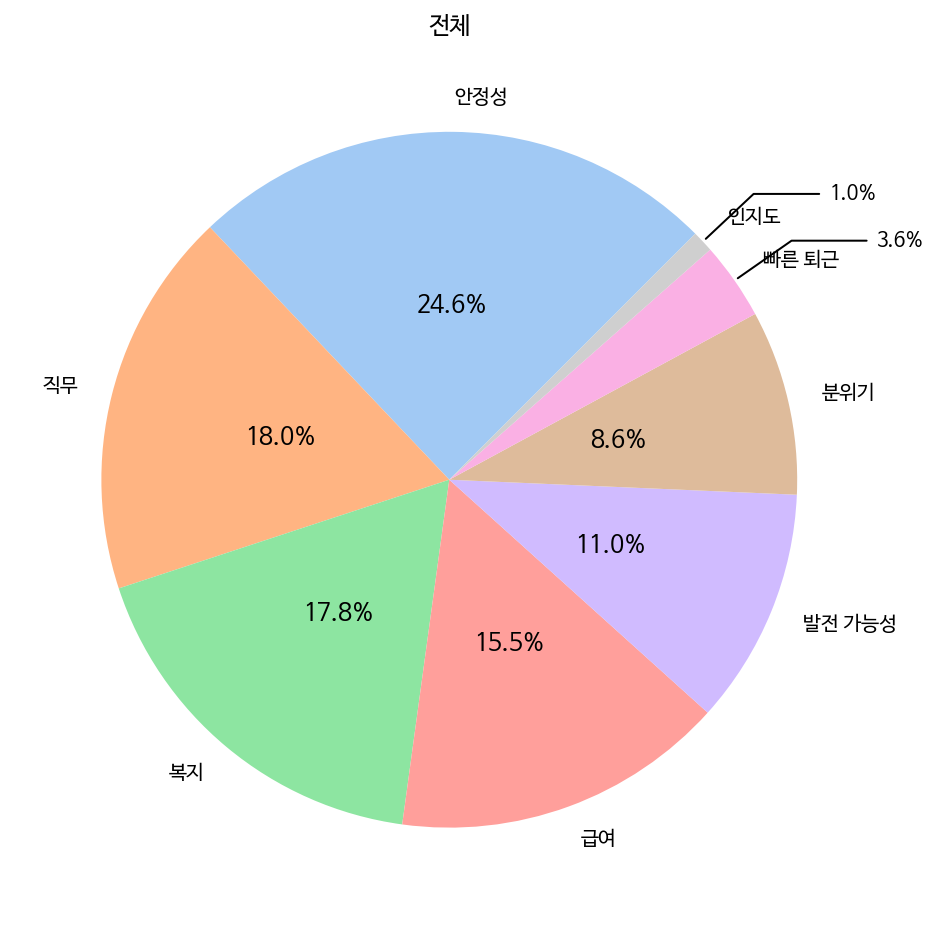

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot()

labels=preference.iloc[0,2:].index.tolist()
total_prefer=preference.iloc[0,2:].tolist()
colors=sns.color_palette('pastel',len(labels))

ax.pie(total_prefer,labels=labels,startangle=45,colors=colors)

# 인지도, 빠른 퇴근의 비율이 다른 label의 비율보다 훨씬 작아서 파이 안의 글자가 겹치게 됨 
# 모든 특성에서 인지도, 빠른 퇴근의 비율이 5보다 작으므로 상한선을 5로 설정함 
threshold=5 

# annotation 설정 
annot_box={'boxstyle':'square','ec':'white','fc':'white'} # annotation box 
config={'arrowprops':{'arrowstyle':'-'},'bbox':annot_box,'va':'center'} #va='center' :수직방향으로 좌표 중앙에 놓임 (vertical alignment)

for i,_ in enumerate(labels):
  ang1,ang2=ax.patches[i].theta1,ax.patches[i].theta2 # 파이의 시작 각, 끝 각
  center,r=ax.patches[i].center,ax.patches[i].r # 원의 중심 좌표와 반지름 길이 
  
  text=f'{total_prefer[i]}%'

  if total_prefer[i] < threshold:
    ang=(ang1+ang2)/2 # 파이의 중심각
    x=np.cos(np.deg2rad(ang)) #annotation이 시작되는 x 좌표 ; np.deg2rad : degree를 radian으로 변환
    y=np.sin(np.deg2rad(ang)) #annotation이 시작되는 y 좌표 

    # ha :horizontal alignment (left: 좌표가 텍스트 왼쪽에 놓임 , right: 좌표가 텍스트 오른쪽에 놓임)
    # x좌표가 양수 -> y축을 중심으로 오른쪽이면 annotation 선이 텍스트의 왼쪽에 위치
    # x좌표가 음수 -> y축을 중심으로 왼쪽이면 annotation 선이 텍스트의 오른쪽에 위치
    ha={-1:'right',1:'left'}[int(np.sign(x))] 
    connectionstyle=f'angle,angleA=0,angleB={ang}' # annotation의 시작점과 끝점 연결 스타일 
    config['arrowprops'].update({'connectionstyle':connectionstyle})
    ax.annotate(text,xy=(x,y),xytext=(1.5*x,1.2*y),ha=ha,**config)

  else:
    x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
    y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    ax.text(x,y,text,ha='center',va='center',fontsize=12)

plt.title('전체')
plt.show()  

- 선호도 (나이대)

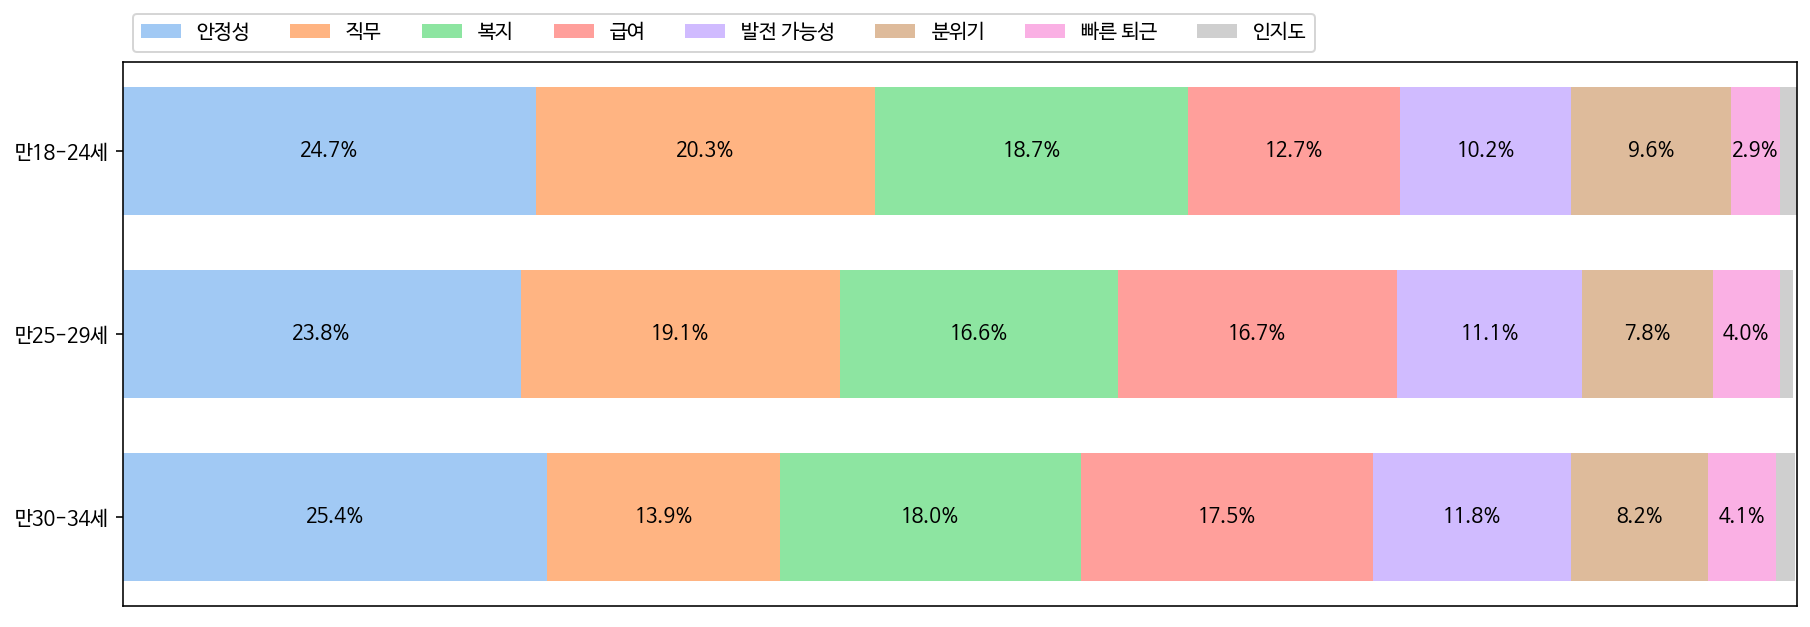

In [ ]:
labels=preference.columns[2:] # 분위기 , 급여 ,...
age=preference.iloc[3:6,1].tolist() # 만 18-24세 , 만 25-29세, 만 30-34세 

# age별 선호도 값을 리스트로 만든 후 array로 변환
prefer_ratio=[]
[prefer_ratio.append(preference.iloc[i,2:].tolist()) for i in range(3,6)]
prefer_ratio=np.array(prefer_ratio)

# age별 선호도 값 누적합 구하기 (선호도 값이 소수점 셋째자리에서 반올림한 것으로 추정됨-> age별 누적합이 100.1,99.9,100 으로 계산됨)
prefer_ratio_cum=prefer_ratio.cumsum(axis=1)

labels_colors=sns.color_palette('pastel',len(labels))

fig,ax=plt.subplots(figsize=(15,5))
ax.invert_yaxis() #y축에 표시되는 값을 반전 (하지 않으면 y축 상단의 값이 만 30-34세가 되고 가장 하단의 값이 만 18-24세가 됨)
ax.xaxis.set_visible(False) # x축 값 표시 x
ax.set_xlim(0,np.sum(prefer_ratio,axis=1).max()) # x 축 limit (0,100.1)

# 누적 막대그래프 그리기 
for i,(label,color) in enumerate(zip(labels,labels_colors)):
  widths=prefer_ratio[:,i] # 각 label별 선호도 값만큼 막대 크기 
  starts = prefer_ratio_cum[:, i] - widths # 각 막대가 그려지는 시작 위치 
  rects = ax.barh(age, widths, left=starts, height=0.7,
                  label=label, color=color)
  
  # 인지도의 막대부분이 너무 작아서 글씨가 겹침 -> 인지도는 모두 1.5 미만이므로 1.5를 상한선으로 정해서, 인지도의 값은 표시 x
  threshold = 1.5
  labels = [f'{width}%' if width > threshold else "" for width in widths]    
  ax.bar_label(rects,labels=labels,label_type='center')

ax.legend(ncol=8, bbox_to_anchor=(0, 1), loc='lower left')
plt.show()

# 5.직종별 경쟁률 ('22) 

## 전처리 

- 구인배수 : 구인인원/구직건수 , 구인배수가 작을수록 구직하기 어려움 

즉 구인배수가 작을수록 경쟁률이 심한 거니까, 경쟁률을 구인배수의 역수로 정의 (구직건수/구인인원)


데이터 :https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1505

In [ ]:
competition= pd.read_excel('/content/drive/MyDrive/멀티캠퍼스_산업데이터_9회차/파이널프로젝트/data/직종별경쟁률2122.xlsx.xlsx',skiprows=2)
competition

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Unnamed: 0,2021,Unnamed: 2,Unnamed: 3,Unnamed: 4,2022,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,신규구인인원,신규구직건수,취업건수,취업률,신규구인인원,신규구직건수,취업건수,취업률
1,계,"1,969,018","3,913,395","973,384",24.9,"2,406,790","3,576,476","877,471",24.5
2,관리직,"14,114","101,330","24,638",24.3,"19,438","91,801","22,032",24.0
3,경영회계사무,"262,014","949,221","238,991",25.2,"318,611","870,821","221,054",25.4
4,금융보험,"3,740","31,079","7,238",23.3,"5,912","29,921","7,063",23.6
5,교육과학연구,"16,308","108,934","21,552",19.8,"19,763","103,448","19,177",18.5
6,법률소방교도,"1,880","22,735","4,192",18.4,"1,756","19,695","3,891",19.8
7,보건의료,"155,634","375,040","93,594",25.0,"199,223","362,079","88,794",24.5
8,사회복지및종교,"72,267","221,223","55,594",25.1,"75,548","218,903","52,504",24.0
9,문화방송예술,"44,340","200,675","47,262",23.6,"44,818","185,946","40,765",21.9


In [ ]:
# 칼럼명 수정
competition.columns=['산업분류','21_신규구인인원','21_신규구직건수','21_취업건수','21_취업률',
                    '22_신규구인인원','22_신규구직건수','22_취업건수','22_취업률']

In [ ]:
competition.drop([0,26,27,28],inplace=True)
competition

,산업분류,21_신규구인인원,21_신규구직건수,21_취업건수,21_취업률,22_신규구인인원,22_신규구직건수,22_취업건수,22_취업률
1,계,"1,969,018","3,913,395","973,384",24.9,"2,406,790","3,576,476","877,471",24.5
2,관리직,"14,114","101,330","24,638",24.3,"19,438","91,801","22,032",24.0
3,경영회계사무,"262,014","949,221","238,991",25.2,"318,611","870,821","221,054",25.4
4,금융보험,"3,740","31,079","7,238",23.3,"5,912","29,921","7,063",23.6
5,교육과학연구,"16,308","108,934","21,552",19.8,"19,763","103,448","19,177",18.5
6,법률소방교도,"1,880","22,735","4,192",18.4,"1,756","19,695","3,891",19.8
7,보건의료,"155,634","375,040","93,594",25.0,"199,223","362,079","88,794",24.5
8,사회복지및종교,"72,267","221,223","55,594",25.1,"75,548","218,903","52,504",24.0
9,문화방송예술,"44,340","200,675","47,262",23.6,"44,818","185,946","40,765",21.9
10,운전및운송,"111,866","157,435","47,579",30.2,"140,231","143,779","44,817",31.2


In [ ]:
competition=competition.iloc[:,[0,5,6,7,8]] #22년 데이터만 뽑기기

In [ ]:
competition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   산업분류       25 non-null     object
 1   22_신규구인인원  25 non-null     object
 2   22_신규구직건수  25 non-null     object
 3   22_취업건수    25 non-null     object
 4   22_취업률     25 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [ ]:
competition['22_신규구인인원']=competition['22_신규구인인원'].str.replace(',','').astype(int)
competition['22_신규구직건수']=competition['22_신규구직건수'].str.replace(',','').astype(int)

In [ ]:
competition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   산업분류       25 non-null     object
 1   22_신규구인인원  25 non-null     int64 
 2   22_신규구직건수  25 non-null     int64 
 3   22_취업건수    25 non-null     object
 4   22_취업률     25 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [ ]:
# 22년도 직종별 경쟁률 계산산
competition['22_경쟁률']=competition['22_신규구직건수']/competition['22_신규구인인원']

In [ ]:
competition

,산업분류,22_신규구인인원,22_신규구직건수,22_취업건수,22_취업률,22_경쟁률
1,계,2406790,3576476,"877,471",24.5,1.485994
2,관리직,19438,91801,"22,032",24.0,4.722760
3,경영회계사무,318611,870821,"221,054",25.4,2.733179
4,금융보험,5912,29921,"7,063",23.6,5.061062
5,교육과학연구,19763,103448,"19,177",18.5,5.234428
6,법률소방교도,1756,19695,"3,891",19.8,11.215831
7,보건의료,199223,362079,"88,794",24.5,1.817456
8,사회복지및종교,75548,218903,"52,504",24.0,2.897535
9,문화방송예술,44818,185946,"40,765",21.9,4.148913
10,운전및운송,140231,143779,"44,817",31.2,1.025301


## 시각화

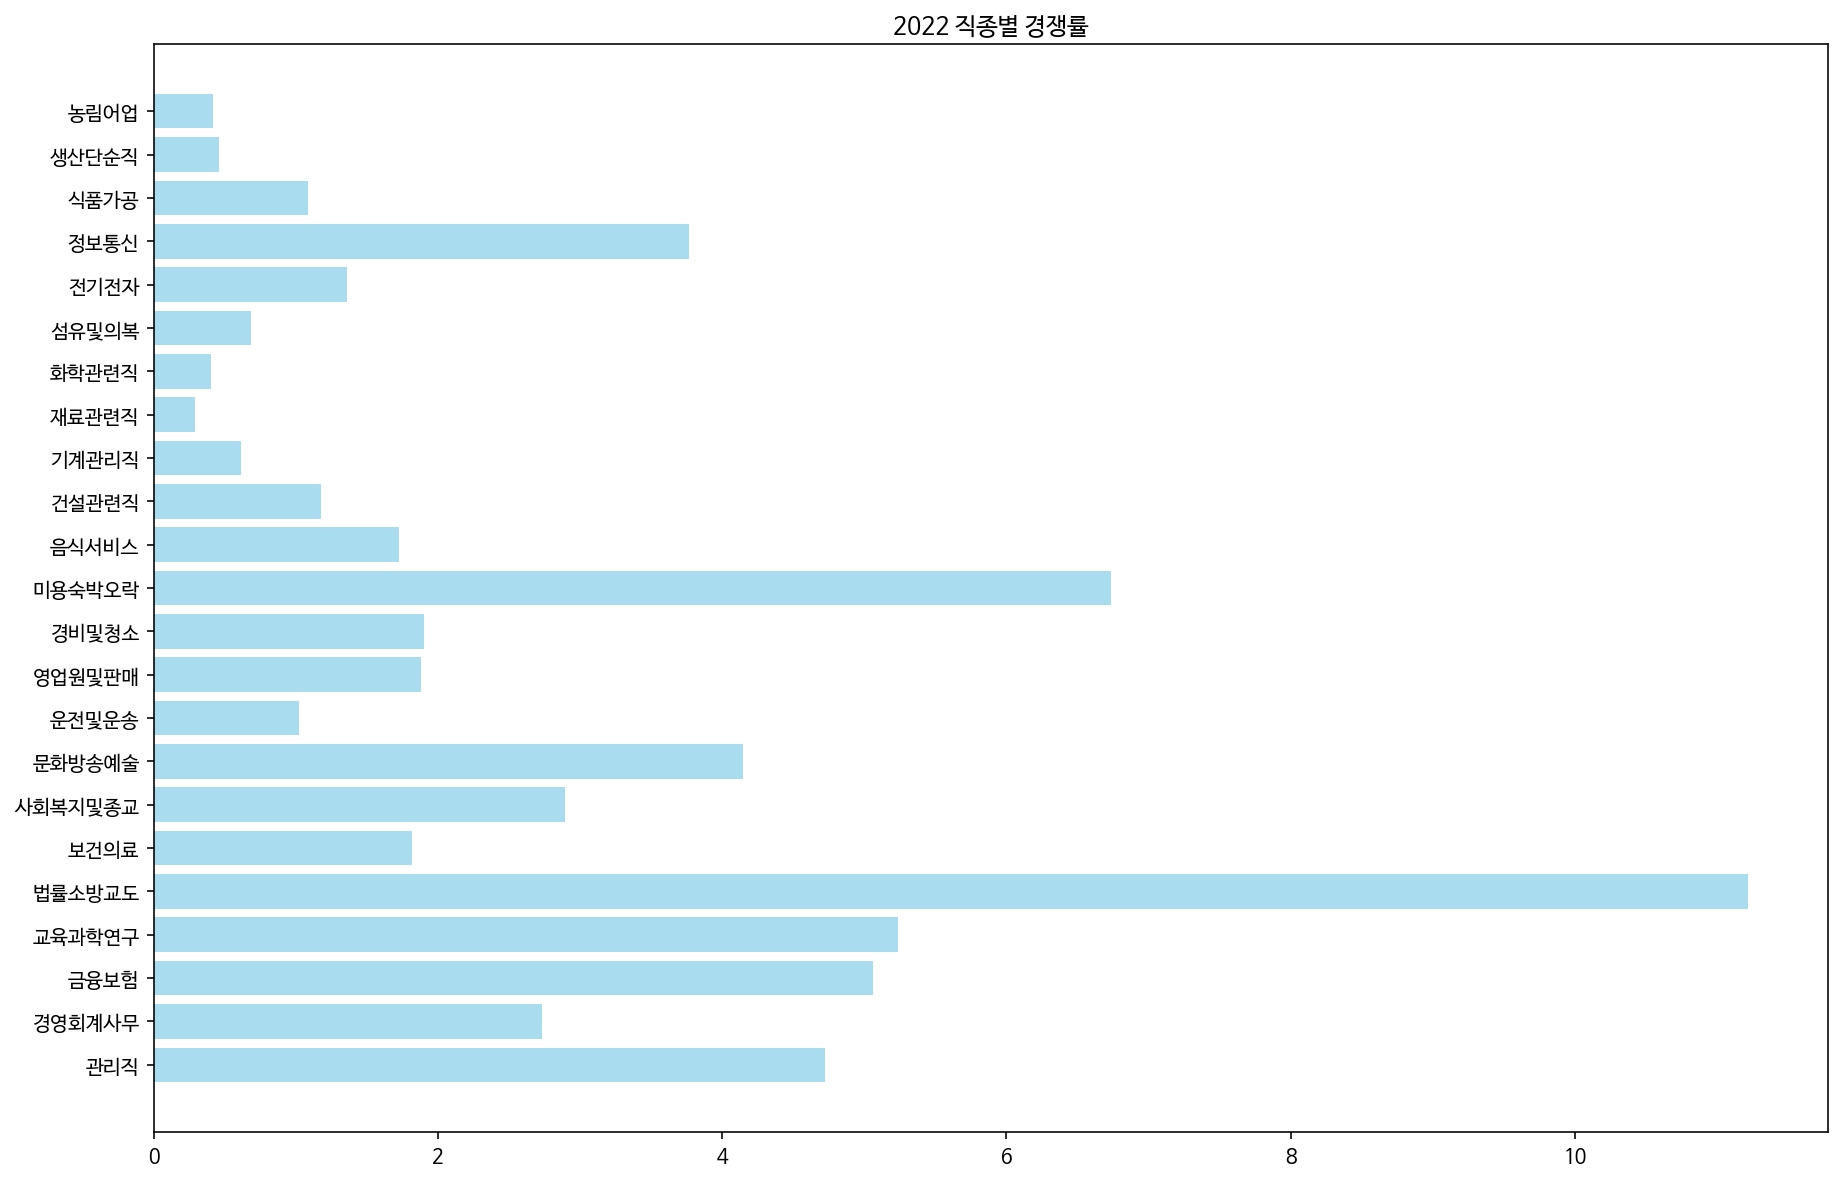

In [ ]:
plt.figure(figsize=(15,10))

plt.barh(competition['산업분류'].iloc[1:-1].tolist(),competition['22_경쟁률'].iloc[1:-1].tolist(),color='skyblue',alpha=0.7) # 계와 군인은 제외!
plt.title('2022 직종별 경쟁률')
plt.show()